# VISUALIZATION

In [1]:
import glob
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_files = [i for i in glob.glob('*.{}'.format('csv'))]
print(data_files)

['britain.csv', 'canada.csv', 'france.csv', 'germany.csv', 'usa.csv']


## Merging all csvs into single data frame named final_data

In [6]:
data_frame = list()
for file in data_files:
    df = pd.read_csv(file, index_col='video_id')
    df['country'] = file[0:3]
    data_frame.append(df)

final_data = pd.concat(data_frame)
final_data.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,bri
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,bri
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,bri


## Handling NANs

In [76]:
final_data[final_data["description"].apply(lambda x: pd.isnull(x))].head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN,bri
sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN,bri
4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN,bri


In [31]:
final_data["description"] = final_data["description"].fillna(value="")

# Distribution of views among videos:

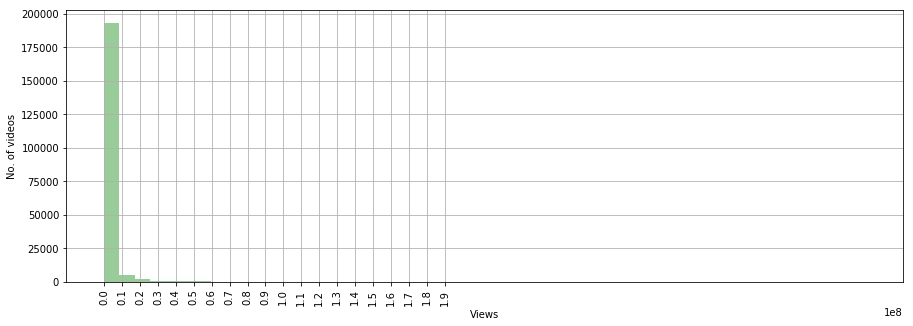

In [32]:
figure, ax = plt.subplots(figsize=(15,5))
figure = sns.distplot(final_data["views"], color="green", kde=False,ax=ax)
figure = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.0e8, 1e7))
figure = plt.xticks(rotation=90)
plt.grid(axis="both")
plt.show(figure)

Most of the trending videos have 5 million or less views.So let's plot the histogram where views are 25 million or less. 

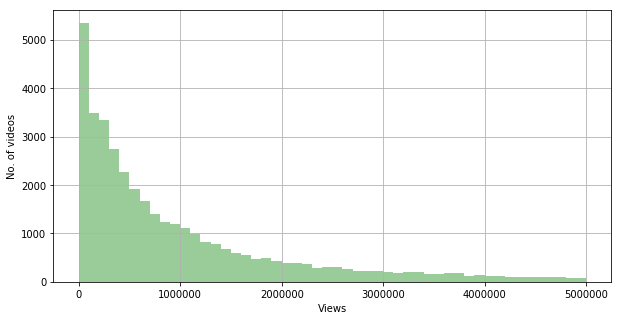

73.255400128515646

In [25]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df[df["views"] < 5e6]["views"], kde=False, color="green", ax=ax)
figure = ax.set(xlabel="Views", ylabel="No. of videos")
plt.grid(axis='both')
plt.show(figure)
final_data[final_data['views'] < 1e6]['views'].count() / final_data['views'].count() * 100

We can see that majority of videos have 1 million views or less.So for a video to be trending views should lie in the above range.

# Distribution of likes among different videos:

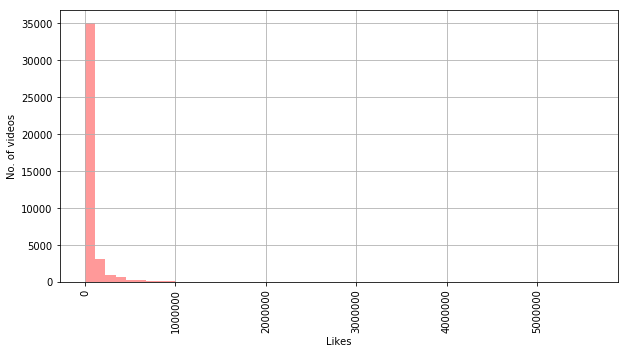

In [35]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df["likes"], color="red",rug=False,kde=False,ax=ax)
figure = ax.set(xlabel="Likes", ylabel="No. of videos")
figure = plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show(figure)

In the above graph, we can observe that majority of trending videos have 1000000 likes.So let's get a deeper pattern by observing only such videos


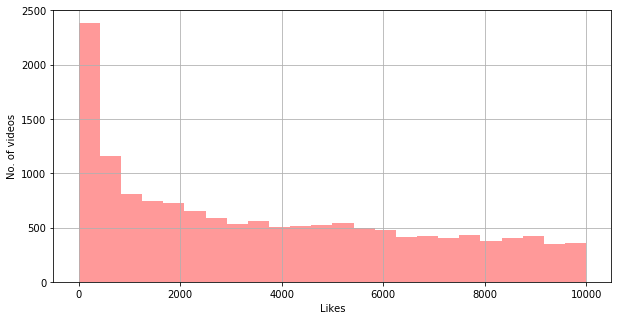

percentage of videos with likes less than 40000


78.078196826652174

In [36]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df[df["likes"] <= 1e4]["likes"], color="red",kde=False,
                      ax=ax)
figure = ax.set(xlabel="Likes", ylabel="No. of videos")
plt.grid(axis='both')
plt.show(figure)
print("percentage of videos with likes less than 40000")
final_data[final_data['likes'] < 4e4]['likes'].count() / final_data['likes'].count() * 100


It can easily be observed that most of the trending videos get likes around 40000 and few amomg them gets likes greater than 40000.This 75% approximately shows the percentage of videos which got likes less than 40000.

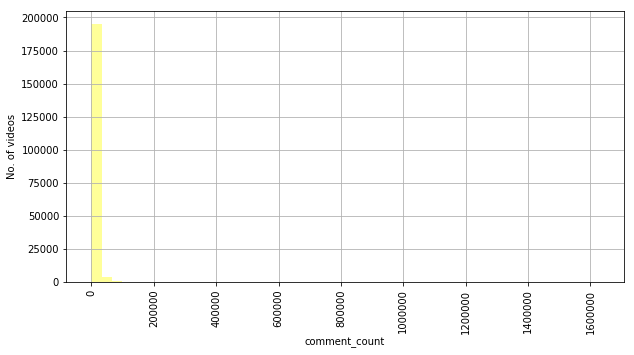

In [37]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(final_data["comment_count"], color="yellow",kde=False,ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
figure = plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show(figure)

Commments are less than 200000 in every video. So it is better to study that range only.

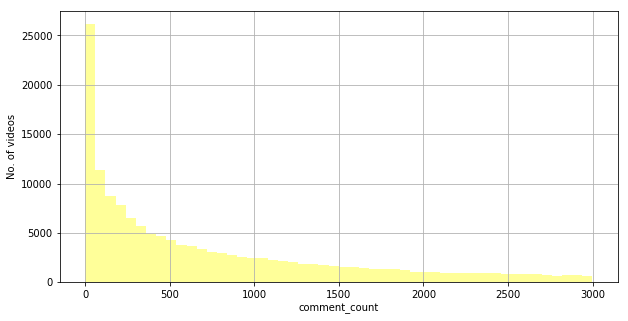

Since most of the trending videos have around 25000/8 = around 3000 comments...since since each division in the graph has six histogram bins.
percentage of videos with likes less than 3000:


72.557461321733967

In [38]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(final_data[final_data["comment_count"] < 3000]["comment_count"], color="yellow",kde=False,
                      ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
plt.grid(axis='both')
plt.show(figure)
print("Since most of the trending videos have around 25000/8 = around 3000 comments...since since each division in the graph has six histogram bins.")
print("percentage of videos with likes less than 3000:")
final_data[final_data['comment_count'] < 3000]['comment_count'].count() / final_data['comment_count'].count() * 100

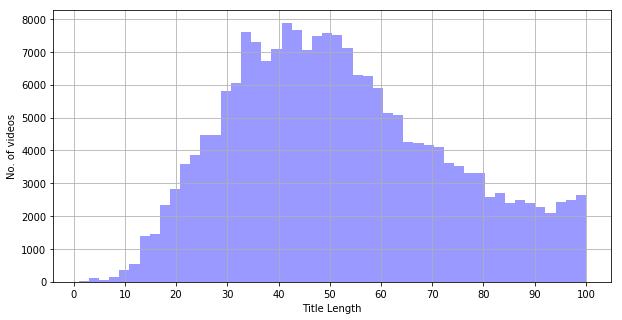

In [39]:
final_data["title_length"] = final_data["title"].apply(lambda x: len(x))

figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(final_data["title_length"],kde=False,
                 color="blue", ax=ax)
figure = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))
plt.grid(axis='both')
plt.show(figure)

From this we can observe that the graph is scattered in almost every range and most of the trending videos have their titles of around 30-60 words.

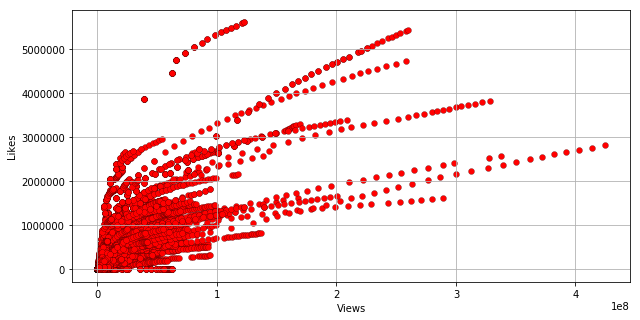

In [40]:
figure, ax = plt.subplots(figsize=(10,5))
figure = plt.scatter(x=final_data['views'], y=final_data['likes'], color="red", edgecolors="black", linewidths=0.2)
figure = ax.set(xlabel="Views", ylabel="Likes")
plt.grid(axis='both')
plt.show()

This graph shows that there is a strong co-relation between the likes and views. Likes and views are propotional i.e., as the number of views increases, the number of likes also  increases.

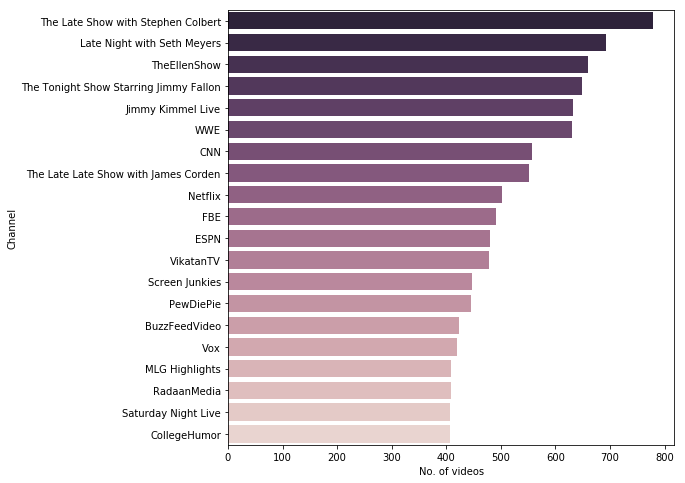

In [41]:
cdf = final_data.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

figure, ax = plt.subplots(figsize=(8,8))
figure = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
figure = ax.set(xlabel="No. of videos", ylabel="Channel")
plt.show()

This bar graph enables us to know the channel whose videos can get trending.So the newbie can know the type of content he/she should prefer to upload to make its videos trending . 

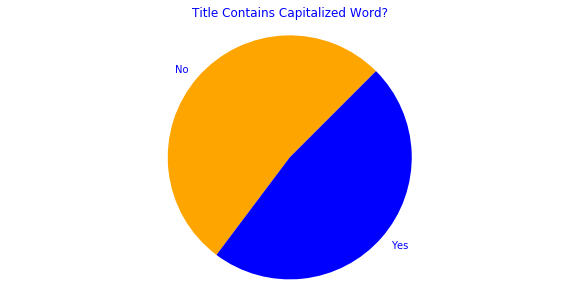

False    0.522426
True     0.477574
Name: capital_word, dtype: float64

In [42]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


final_data["capital_word"] = final_data["title"].apply(contains_capitalized_word)

value_counts = final_data["capital_word"].value_counts().to_dict()
figure, ax = plt.subplots(figsize=(10,5))
figure= ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['orange', 'blue'], textprops={'color': 'blue'}, startangle=45)
figure = ax.axis('equal')
figure = ax.set_title('Title Contains Capitalized Word?',color='blue')
plt.show()
final_data["capital_word"].value_counts(normalize=True)

From this pie chart we can observe that 44% of the trending videos contain atleast a capital word.But, from this nothing can be inferred about the trend.